## PSR Analysis

PSR is the number of packets that went through gateway divided by the total number of attempts made by sensor. 

#### PSR Analysis using the old definition : (no of data points received / 60)|

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# restoring stored dataframes variable
%store -r 

In [3]:
sensors = list(dataframes.keys())

In [4]:
sns.set(rc = {'figure.figsize':(100,100)})
%config InlineBackend.figure_format = 'retina'

In [86]:
sns.set(rc = {'figure.figsize':(50,50)})
good_snr = 0
for i, sensor in enumerate(sensors):
    data = dataframes[sensor]
    data['time'] = pd.to_datetime(data['time'])
    
    if data.shape[0] == 0:
        continue
    
    hourly_average = (data.set_index('time')['batt_v'].resample('1H').count())/60
    df = pd.DataFrame(hourly_average)
    
    if (df['batt_v']  < 0.8).any():
        good_snr += 1
        plt.subplot(27,2, i+1)
        sns.histplot(df)
        plt.title(sensor)
        plt.plot()

        i += 1
print(f"{i} sensors have psr less than 1.")

53 sensors have psr less than 1.


It seems that according to old definition of PSR all sensors have PSR less than 1. Although we saw sensors sending data even before a minute, PSR says everything is fine. This might also point that we might not be receiving data every minute in some cases. 

#### PSR Analysis using the old definition : Using f_count

In [81]:
i = 0
good_snr = 0
for sensor in sensors[:1]:
    data = dataframes[sensor]
    data['time'] = pd.to_datetime(data['time'])
    
    if data.shape[0] == 0:
        continue
    
    hourly_average = data.set_index('time')['f_cnt']
    #.resample('1H').agg({ 'PSR': lambda x: (x.count()/(x.max() - x.min())) })
    df = pd.DataFrame(hourly_average)
    df = df.rename(columns={'f_cnt': 'PSR'})
    df = df.reset_index(drop=False)
    #df.drop(['level_0'], axis=1, inplace=True)
    

In [94]:
sensors

['light_maroon_penguin',
 'useless_crimson_rook',
 'closed_wagon_snail',
 'handsome_violet_leech',
 'easily_dear_mouse',
 'daily_ace_bear',
 'bored_blue_fish',
 'highly_master_pony',
 'boring_olive_stingray',
 'lonely_quiet_bear',
 'likely-well-thrush',
 'barely_hot_aphid',
 'mildly_calm_ibex',
 'big_pink_elephant',
 'widely_whole_tarpon',
 'lovely_helped_lamb',
 'duly_star_bee',
 'poorly_sunny_earwig',
 'mainly_kind_boxer',
 'daily_new_falcon',
 'daily_gentle_beetle',
 'weekly_fair_dove',
 'tired_red_monkey',
 'mainly_whole_slug',
 'hardly_usable_boxer',
 'purely_fancy_kite',
 'random_stuck_buffalo',
 'weekly_poetic_guinea',
 'slowly_fast_sawfly',
 'early_still_frog',
 'widely_full_weevil',
 'overly_heroic_squid',
 'clearly_bored_turtle',
 'daily_happy_satyr',
 'jolly_tender_squid',
 'future_aqua_wildcat',
 'small_red_chicken',
 'asleep_apricot_bedbug',
 'highly_comic_akita',
 'mean_flying_fish',
 'slowly_key_husky',
 'sadly-direct-walrus',
 'blue_eyed_tiger',
 'gladly_mint_snail',
 '

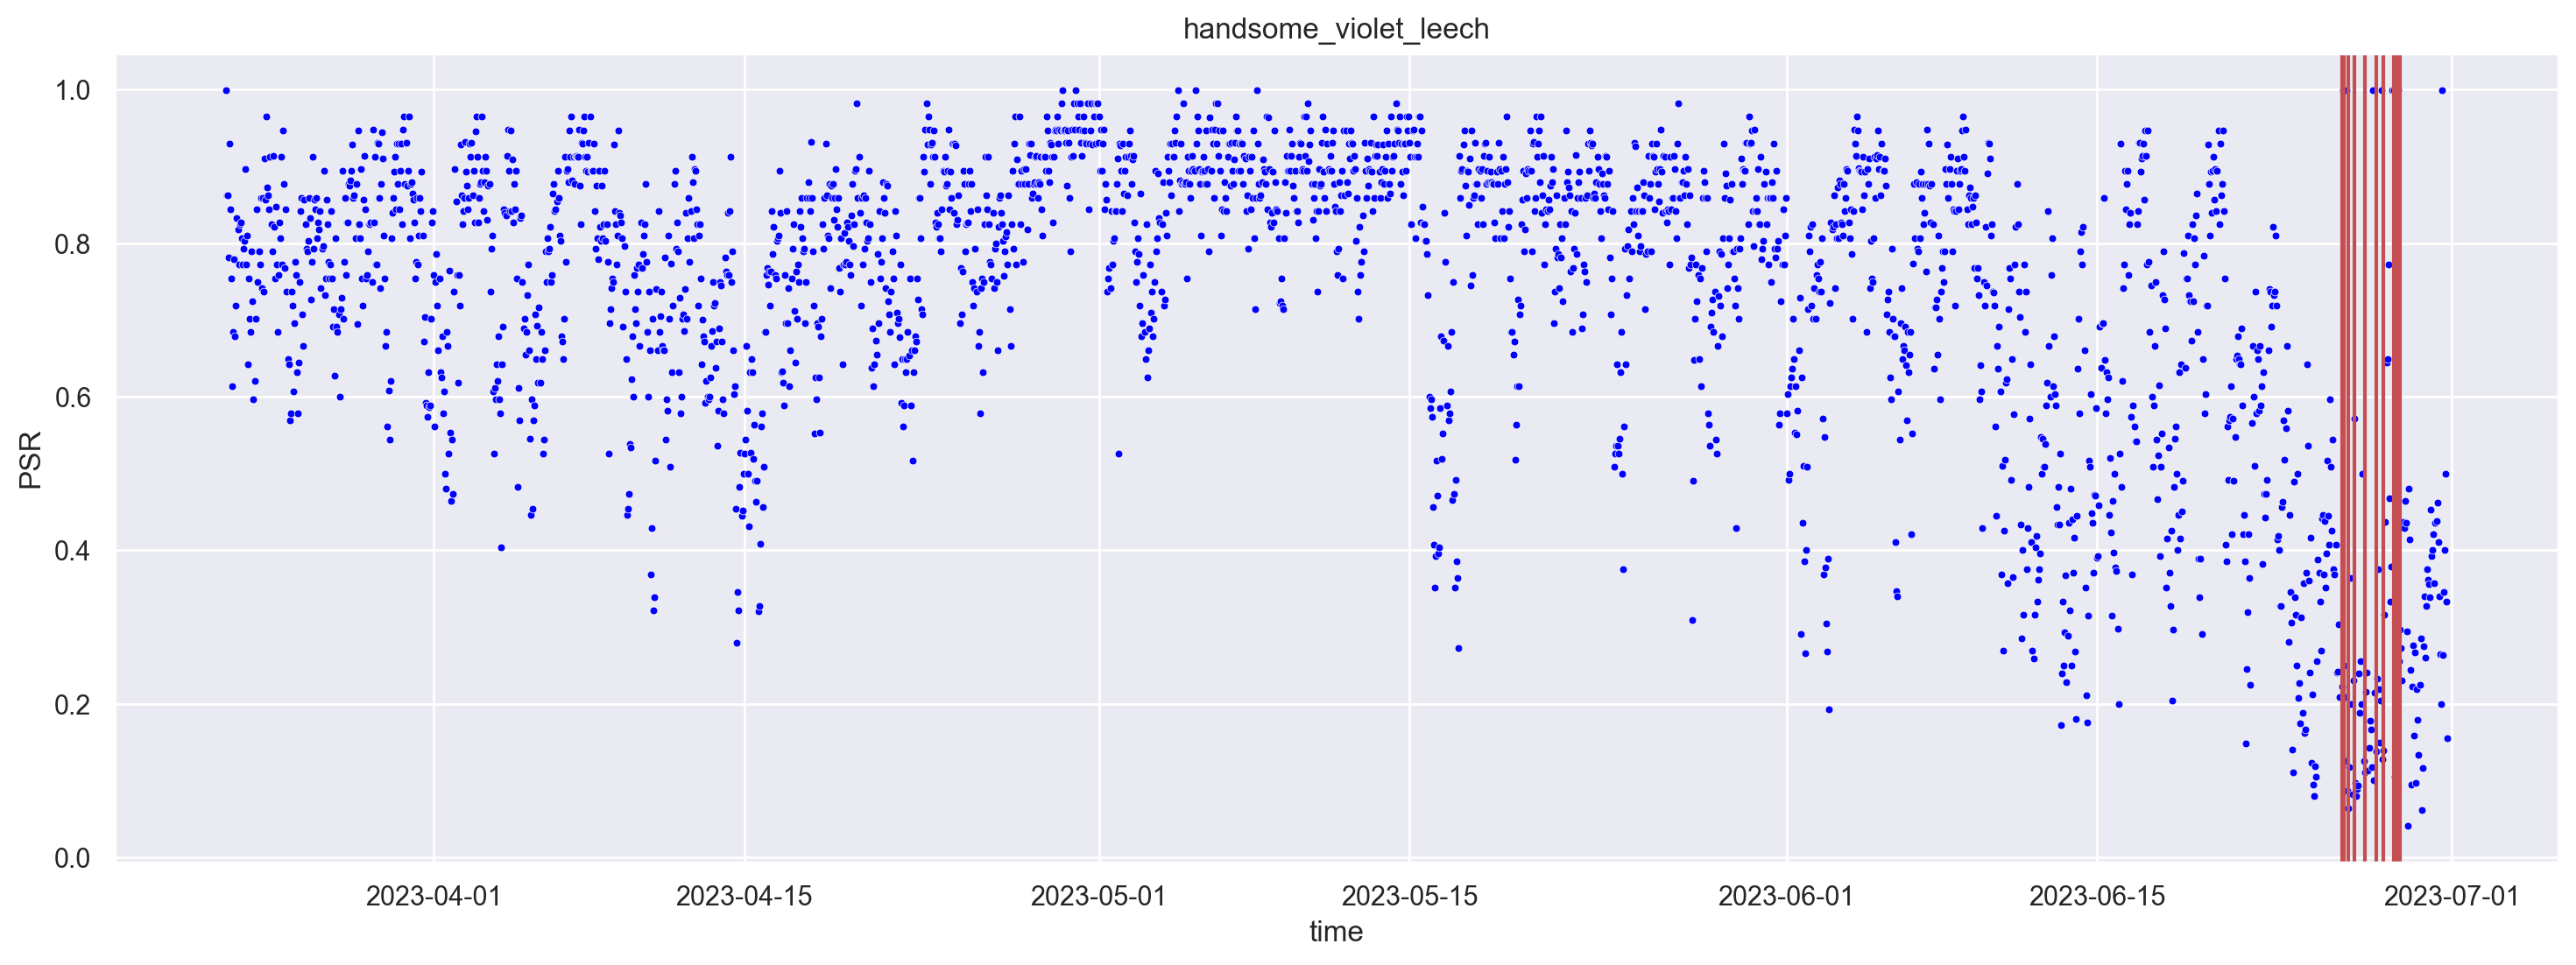

In [143]:
from datetime import datetime
from dateutil import parser

sns.set(rc = {'figure.figsize':(18,6)})
good_snr = 0
for i, sensor in enumerate(sensors[3:4]):
    data = dataframes[sensor]
    data['time'] = pd.to_datetime(data['time'])
    
    if data.shape[0] == 0:
        continue
    
    ## This gets us the psr
    hourly_average = data.set_index('time')['f_cnt'].resample('1H').agg({ 'PSR': lambda x: (x.count()/((x.max() - x.min())+1)) })
    df = pd.DataFrame(hourly_average)
    df = df.rename(columns={'f_cnt': 'PSR'})
    df = df.reset_index(drop=False)
    #df.drop(['level_0'], axis=1, inplace=True)
    
    
    #plt.subplot(6,1, i+1)

    sns.scatterplot(data = df, x = 'time', y = 'PSR', s=10, color = 'blue')
    #plt.xticks(rotation=45, ha='right')
    plt.title(sensor)
    #plt.legend(fontsize='small', loc='upper right',  bbox_to_anchor=(1.2, 0.9))
    
    
    for time in failed_times:
        time = datetime = parser.parse(time).replace(microsecond=0) + timedelta(seconds=1)
        plt.axvline(x=time, color='r')

In [115]:
ind = list(list(less_failing_data.values())[0])
failed_times = list(dataframes['handsome_violet_leech'].loc[ind]['time'])



In [130]:
from datetime import timedelta


for time in failed_times[:1]:
    
    print(time)

2023-06-26 01:26:00+00:00


In [137]:
failed_times

['2023-06-26 01:25:59.338000+00:00',
 '2023-06-26 02:58:21.848000+00:00',
 '2023-06-26 07:29:10.614000+00:00',
 '2023-06-26 14:29:01.284000+00:00',
 '2023-06-27 01:16:42.406000+00:00',
 '2023-06-27 14:29:18.942000+00:00',
 '2023-06-27 21:14:22.632000+00:00',
 '2023-06-28 09:27:01.710000+00:00',
 '2023-06-28 10:37:17.501000+00:00',
 '2023-06-28 12:01:13.936000+00:00',
 '2023-06-28 15:14:21.260000+00:00']